# Bharat Intern :- Data Science Intern task

## Task 1 :- Stock Price Prediction using LSTM algorithm


### objective :- Predict the stock price of any company using LSTM  

#### perform by :- Digambar Sable 

# ---------------------------------------------------------------------------------------------------------- 

### Import Library 

In [1]:
import pandas_datareader as pdr

### Import Dataset

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key="b9e5798801e42fc0682f36b56f")

C:\Users\drsab\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd #pandas library used for read the file

In [8]:
df = pd.read_csv('AAPL.csv')

In [9]:
df.head()  #check top 5 entries

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-25 00:00:00+00:00,182.17,184.92,180.73,183.40,31663096,43.520175,44.177146,43.176161,43.814020,126652384,0.0,1.0
1,AAPL,2018-06-26 00:00:00+00:00,184.43,186.53,182.54,182.99,24569201,44.060086,44.561773,43.608567,43.716072,98276804,0.0,1.0
2,AAPL,2018-06-27 00:00:00+00:00,184.16,187.28,184.03,185.23,25285328,43.995583,44.740947,43.964526,44.251205,101141312,0.0,1.0
3,AAPL,2018-06-28 00:00:00+00:00,185.50,186.21,183.80,184.10,17365235,44.315707,44.485326,43.909580,43.981249,69460940,0.0,1.0
4,AAPL,2018-06-29 00:00:00+00:00,185.11,187.19,182.91,186.29,22737666,44.222537,44.719446,43.696960,44.504437,90950664,0.0,1.0


In [10]:
df.tail() #Check last 5 entries

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-06-16 00:00:00+00:00,184.92,186.990,184.2700,186.73,101256225,184.92,186.990,184.2700,186.73,101256225,0.0,1.0
1254,AAPL,2023-06-20 00:00:00+00:00,185.01,186.100,184.4100,184.41,49799092,185.01,186.100,184.4100,184.41,49799092,0.0,1.0
1255,AAPL,2023-06-21 00:00:00+00:00,183.96,185.410,182.5901,184.90,49515697,183.96,185.410,182.5901,184.90,49515697,0.0,1.0
1256,AAPL,2023-06-22 00:00:00+00:00,187.00,187.045,183.6700,183.74,51245327,187.00,187.045,183.6700,183.74,51245327,0.0,1.0
1257,AAPL,2023-06-23 00:00:00+00:00,186.68,187.560,185.0100,185.55,53116996,186.68,187.560,185.0100,185.55,53116996,0.0,1.0


In [11]:
df1 = df.reset_index()['close']

In [12]:
df1.shape   #Check the shape of dataset

(1258,)

In [13]:
df1.head()

0    182.17
1    184.43
2    184.16
3    185.50
4    185.11
Name: close, dtype: float64

### Visualization of dataset

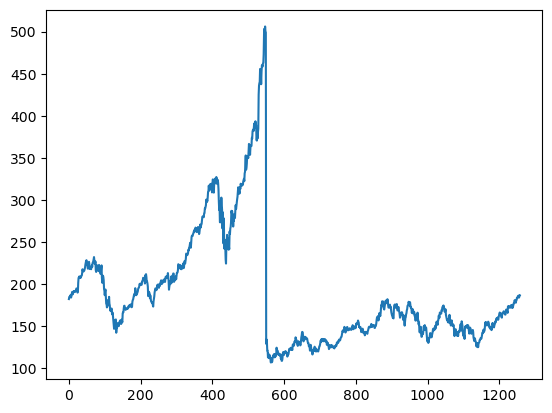

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)                 #visualize the data

In [15]:
###LSTM is very sesetive to scale of the data

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1.shape

(1258, 1)

### Data Partition 

In [19]:
#splitting dataset into two parts train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(817, 441)

In [21]:
train_data

array([[1.88678773e-01],
       [1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],


In [22]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t, t+1,t+2,t+3 and t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train)

[[0.18867877 0.19433939 0.19366312 ... 0.2445335  0.21873513 0.21387602]
 [0.19433939 0.19366312 0.19701941 ... 0.21873513 0.21387602 0.20027552]
 [0.19366312 0.19701941 0.19604258 ... 0.21387602 0.20027552 0.21182217]
 ...
 [0.06983093 0.06900438 0.06697558 ... 0.10697558 0.10339386 0.10567314]
 [0.06900438 0.06697558 0.06672511 ... 0.10339386 0.10567314 0.10507201]
 [0.06697558 0.06672511 0.06166562 ... 0.10567314 0.10507201 0.09823419]]


In [25]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape),print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [27]:
#reshape input to be [ samples, time steps, features ] which is required for LSTM

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

### Model Building 

In [28]:
#Create the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 331ms/step - loss: 0.0373 - val_loss: 0.0013
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0149 - val_loss: 0.0034
Epoch 3/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0112 - val_loss: 4.1136e-04
Epoch 4/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0094 - val_loss: 5.7625e-04
Epoch 5/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0083 - val_loss: 3.3406e-04
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0072 - val_loss: 5.9361e-04
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0081 - val_loss: 4.7181e-04
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0070 - val_loss: 3.8504e-04
Epoch 9/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0055 - val_loss: 4.9190e-04
Epoch 10/100
12/12 [==============================] - 2s 191ms

12/12 [==============================] - 2s 184ms/step - loss: 0.0017 - val_loss: 2.2201e-04
Epoch 79/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0016 - val_loss: 2.5842e-04
Epoch 80/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0014 - val_loss: 2.1070e-04
Epoch 81/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0015 - val_loss: 2.6704e-04
Epoch 82/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0016 - val_loss: 2.1171e-04
Epoch 83/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0031 - val_loss: 5.2011e-04
Epoch 84/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0031 - val_loss: 3.3134e-04
Epoch 85/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0024 - val_loss: 3.5936e-04
Epoch 86/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0019 - val_loss: 2.7867e-04
Epoch 87/100
12/12 [==============================] - 2s 18

In [36]:
import tensorflow as tf

In [38]:
tf.__version__

'2.12.0'

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [39]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

220.36159033066835

In [41]:
### Test data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

154.52259835320353

### Plotting  graph 

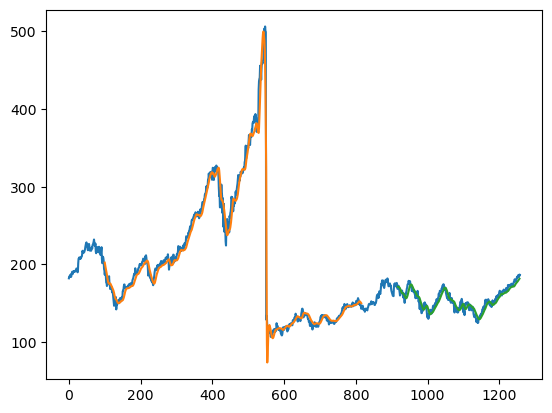

In [42]:
### Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
# shift test prediction for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]= test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

441

In [45]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
temp_input

[0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.1425673137132

In [55]:
# demostrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(Temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps, 1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
            
print(lst_output)

0 day input [0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467

8 day output [[0.18395084]]
9 day input [0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669

17 day output [[0.1739512]]
18 day input [0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.18996185 0.19053632 0.19048522
 0.18998986 0.18921863 

26 day output [[0.16540743]]
27 day input [0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.18996185 0.19053632 0.19048522 0.18998986 0.18921863 0.18828748
 0.18726525 0.18618961 0.18508077 0.18395084 0.18280853 0.18166116
 0.18051553 0.179377

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101, 131)

In [58]:
import matplotlib.pyplot as plt

In [59]:
len(df1)

1258

In [60]:
df3=df1.tolist()
df3.extend(lst_output)

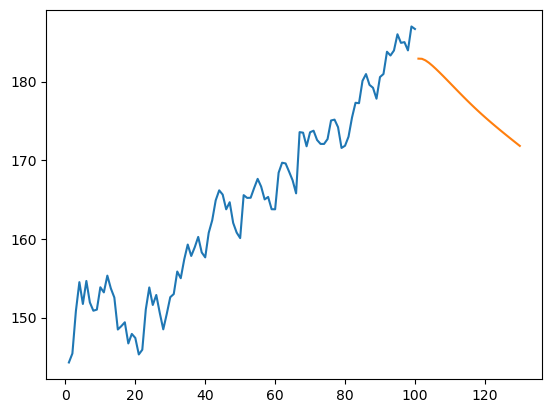

In [61]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

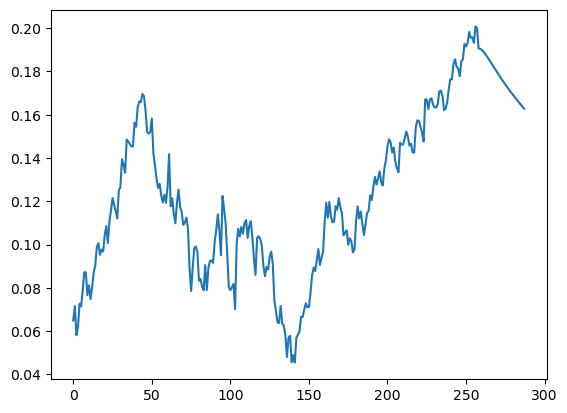

In [62]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

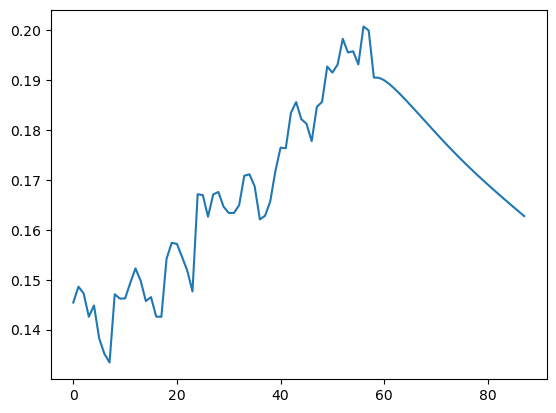

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

#### ---------------------------------------------------------------------------------------------------------
